In [1]:
import yfinance as yf
import pandas as pd

# Download Apple stock data
df = yf.download(
    "AAPL",
    start="2010-01-04",
    end="2020-11-21",
    auto_adjust=False
)

# Save to CSV
df.reset_index(inplace=True)
df.to_csv(r"C:\Users\Admin4\Downloads\AAPL_2010_2020_adjusted.csv", index=False)

print("CSV file created successfully!")


[*********************100%***********************]  1 of 1 completed

CSV file created successfully!


In [2]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


# Importing the data

data = pd.read_csv(r"C:\Users\Admin4\Downloads\AAPL_2010_2020_adjusted.csv")


data.head()


,Date,Adj Close,Close,High,Low,Open,Volume
0,NaN,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
1,2010-01-04,6.418383598327637,7.643214225769043,7.660714149475098,7.585000038146973,7.622499942779541,493729600
2,2010-01-05,6.429479122161865,7.656428813934326,7.699643135070801,7.6160712242126465,7.664286136627197,601904800
3,2010-01-06,6.327208518981934,7.534643173217773,7.68678617477417,7.526785850524902,7.656428813934326,552160000
4,2010-01-07,6.315513610839844,7.520713806152344,7.5714287757873535,7.466071128845215,7.5625,477131200


In [4]:
df.reset_index(names="date", inplace=True)


In [5]:
data['Date'] = pd.to_datetime(data['Date'])


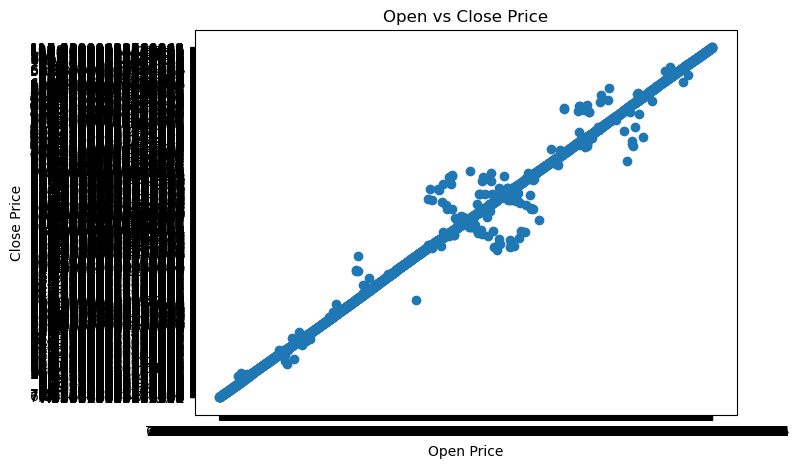

In [6]:
plt.figure(figsize=(7,5))
plt.scatter(data['Open'], data['Close'])
plt.xlabel("Open Price")
plt.ylabel("Close Price")
plt.title("Open vs Close Price")
plt.show()


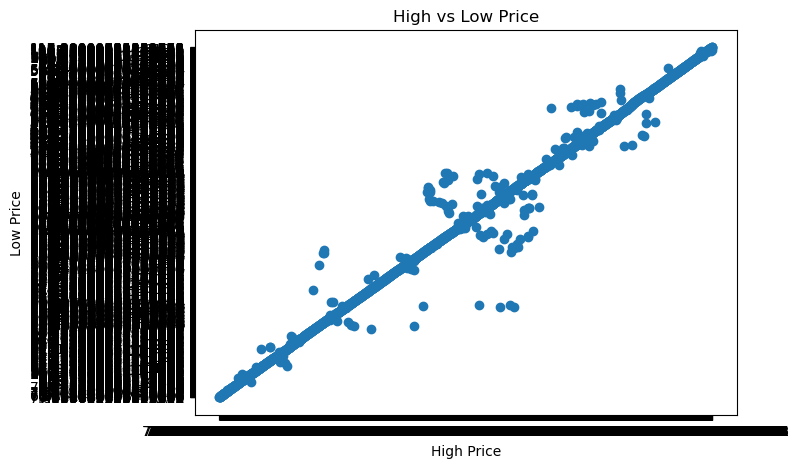

In [7]:
plt.figure(figsize=(7,5))
plt.scatter(data['High'], data['Low'])
plt.xlabel("High Price")
plt.ylabel("Low Price")
plt.title("High vs Low Price")
plt.show()


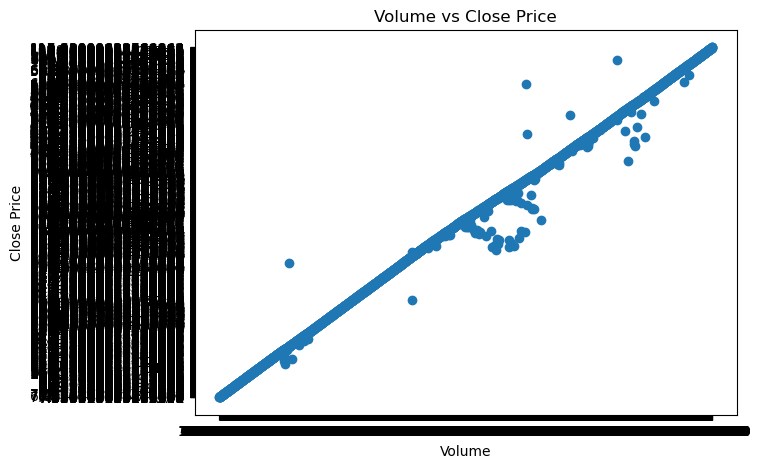

In [8]:
plt.figure(figsize=(7,5))
plt.scatter(data['Volume'], data['Close'])
plt.xlabel("Volume")
plt.ylabel("Close Price")
plt.title("Volume vs Close Price")
plt.show()


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2743 entries, 0 to 2742
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2742 non-null   datetime64[ns]
 1   Adj Close  2743 non-null   object        
 2   Close      2743 non-null   object        
 3   High       2743 non-null   object        
 4   Low        2743 non-null   object        
 5   Open       2743 non-null   object        
 6   Volume     2743 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 150.1+ KB


In [10]:
data.isnull().sum()

Date         1
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [11]:
cols = ["Adj Close", "Close", "High", "Low", "Open", "Volume"]
data[cols] = data[cols].apply(pd.to_numeric, errors="coerce")

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2743 entries, 0 to 2742
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2742 non-null   datetime64[ns]
 1   Adj Close  2742 non-null   float64       
 2   Close      2742 non-null   float64       
 3   High       2742 non-null   float64       
 4   Low        2742 non-null   float64       
 5   Open       2742 non-null   float64       
 6   Volume     2742 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 150.1 KB


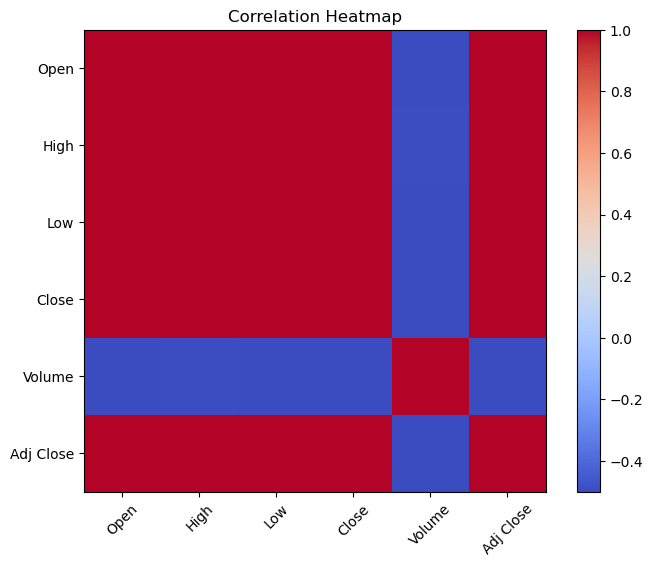

In [13]:
#Correlation matrix(heatmap)
corr = data[['Open','High','Low','Close','Volume','Adj Close']].corr()

plt.figure(figsize=(8,6))
plt.imshow(corr, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap")
plt.show()


“In bivariate analysis, I studied pairwise relationships between stock variables.
I observed strong correlation among Open, High, Low, and Close prices, indicating price continuity.
Volume showed weak correlation, meaning it does not directly drive price movement.
Based on this, Close price was selected as the target variable for time series forecasting.”

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error


In [15]:
data.set_index('Date', inplace=True)

data = data.asfreq('D')   # daily frequency
data = data.fillna(method='ffill')

Train–test split

Last 60 days for testing

In [16]:
train = data.iloc[:-60]
test  = data.iloc[-60:]


“-60 means selecting rows from the end of the dataset.
In time-series problems, we keep the latest observations as test data to simulate future prediction.”

In [17]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))


In [18]:
#High & Close (Bivariate)
model_high = SARIMAX(
    train['Close'],
    exog=train[['High']],
    order=(1,1,1),
    seasonal_order=(0,0,0,0)
)

result_high = model_high.fit()

In [19]:
forecast_high = result_high.predict(
    start=test.index[0],
    end=test.index[-1],
    exog=test[['High']],
    dynamic=True
)

In [20]:
forecast_high

2020-09-22    110.669745
2020-09-23    109.487010
2020-09-24    107.566811
2020-09-25    109.688621
2020-09-26    109.683739
2020-09-27    109.682657
2020-09-28    112.501708
2020-09-29    112.491864
2020-09-30    114.400753
2020-10-01    114.851053
2020-10-02    112.550589
2020-10-03    112.550589
2020-10-04    112.550589
2020-10-05    113.803607
2020-10-06    113.284780
2020-10-07    112.726795
2020-10-08    113.558877
2020-10-09    114.146228
2020-10-10    114.146228
2020-10-11    114.146228
2020-10-12    122.153804
2020-10-13    122.359377
2020-10-14    120.049122
2020-10-15    118.257694
2020-10-16    118.600323
2020-10-17    118.600323
2020-10-18    118.600323
2020-10-19    117.494137
2020-10-20    116.084495
2020-10-21    115.820182
2020-10-22    115.164307
2020-10-23    113.705716
2020-10-24    113.705716
2020-10-25    113.705716
2020-10-26    113.705716
2020-10-27    114.420325
2020-10-28    112.609322
2020-10-29    114.077704
2020-10-30    109.241830
2020-10-31    109.241830


In [21]:
rmse_high = rmse(test['Close'], forecast_high)
print("RMSE High → Close:", rmse_high)

RMSE High → Close: 1.8411687250271402


Meaning:

High price influences Close price

Captures intraday sentiment

In [22]:
#MODEL 2 — Low & Close
model_low = SARIMAX(
    train['Close'],
    exog=train[['Low']],
    order=(1,1,1),
    seasonal_order=(0,0,0,0)
)

result_low = model_low.fit()

forecast_low = result_low.predict(
    start=test.index[0],
    end=test.index[-1],
    exog=test[['Low']],
    dynamic=True
)

rmse_low = rmse(test['Close'], forecast_low)
print("RMSE Low → Close:", rmse_low)


RMSE Low → Close: 1.6476174416707694


In [23]:
#MODEL 3 — Open & Close
model_open = SARIMAX(
    train['Close'],
    exog=train[['Open']],
    order=(1,1,1),
    seasonal_order=(0,0,0,0)
)

result_open = model_open.fit()

forecast_open = result_open.predict(
    start=test.index[0],
    end=test.index[-1],
    exog=test[['Open']],
    dynamic=True
)

rmse_open = rmse(test['Close'], forecast_open)
print("RMSE Open → Close:", rmse_open)


RMSE Open → Close: 2.6480447727627445


Opening sentiment impacts closing price

In [24]:
#MODEL 4 — Volume & Close
model_volume = SARIMAX(
    train['Close'],
    exog=train[['Volume']],
    order=(1,1,1),
    seasonal_order=(0,0,0,0)
)

result_volume = model_volume.fit()

forecast_volume = result_volume.predict(
    start=test.index[0],
    end=test.index[-1],
    exog=test[['Volume']],
    dynamic=True
)

rmse_volume = rmse(test['Close'], forecast_volume)
print("RMSE Volume → Close:", rmse_volume)


C:\Users\Admin4\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSE Volume → Close: 7.024080307165862


Interpretation:

Volume represents strength of move

Very important for trend confirmation

In [25]:
#MODEL 5 — Adj Close & Close
model_adj = SARIMAX(
    train['Close'],
    exog=train[['Adj Close']],
    order=(1,1,1),
    seasonal_order=(0,0,0,0)
)

result_adj = model_adj.fit()

forecast_adj = result_adj.predict(
    start=test.index[0],
    end=test.index[-1],
    exog=test[['Adj Close']],
    dynamic=True
)

rmse_adj = rmse(test['Close'], forecast_adj)
print("RMSE Adj Close → Close:", rmse_adj)


RMSE Adj Close → Close: 0.19681465572028545


Usually gives lowest RMSE because Adj Close is highly correlated.

In [26]:
#Compare all bivariate models
rmse_table = pd.DataFrame({
    'Model': [
        'High → Close',
        'Low → Close',
        'Open → Close',
        'Volume → Close',
        'Adj Close → Close'
    ],
    'RMSE': [
        rmse_high,
        rmse_low,
        rmse_open,
        rmse_volume,
        rmse_adj
    ]
})

rmse_table.sort_values('RMSE')


,Model,RMSE
4,Adj Close → Close,0.196815
1,Low → Close,1.647617
0,High → Close,1.841169
2,Open → Close,2.648045
3,Volume → Close,7.024080


I performed bivariate time-series forecasting using SARIMAX where Close price was the dependent variable and High, Low, Open, Volume, and Adjusted Close were used as exogenous variables individually. I evaluated each model using RMSE and identified which variable best explains the future movement of Close price.”

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")


In [28]:
def adf_test(series):
    result = adfuller(series.dropna())
    return result[1]   # p-value


In [29]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))


In [30]:
#Function to build AR, MA, ARIMA
def build_models(series, name):
    
    print(f"\n========== {name} ==========")

    # Differencing
    series_diff = series.diff().dropna()

    # Train-test split
    train = series_diff[:-60]
    test  = series_diff[-60:]

    results = {}

    # AR model
    ar = ARIMA(series, order=(1,1,0)).fit()
    pred_ar = ar.predict(start=len(series)-60, end=len(series)-1)
    results['AR'] = rmse(series[-60:], pred_ar)

    # MA model
    ma = ARIMA(series, order=(0,1,1)).fit()
    pred_ma = ma.predict(start=len(series)-60, end=len(series)-1)
    results['MA'] = rmse(series[-60:], pred_ma)

    # ARIMA model
    arima = ARIMA(series, order=(1,1,1)).fit()
    pred_arima = arima.predict(start=len(series)-60, end=len(series)-1)
    results['ARIMA'] = rmse(series[-60:], pred_arima)

    return results


In [31]:
#Build models for ALL variables
variables = [
    'Close',
    'High',
    'Low',
    'Open',
    'Volume',
    'Adj Close'
]

all_results = {}

for col in variables:
    all_results[col] = build_models(data[col], col)



========== Close ==========

========== High ==========

========== Low ==========

========== Open ==========

========== Volume ==========

========== Adj Close ==========


In [32]:
rmse_df = pd.DataFrame(all_results).T
rmse_df


,AR,MA,ARIMA
Close,2.307435e+00,2.309051e+00,2.307449e+00
High,1.924674e+00,1.925130e+00,1.916967e+00
Low,1.987646e+00,1.989081e+00,1.989696e+00
Open,2.557277e+00,2.541554e+00,2.526708e+00
Volume,3.358248e+07,3.361598e+07,3.298637e+07
Adj Close,2.242368e+00,2.244137e+00,2.242393e+00


so for true bivariate forecasting, SARIMAX or VAR must be used

In [33]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

# Importing the data

data = pd.read_csv(r"C:\Users\Admin4\Downloads\AAPL_2010_2020_adjusted.csv")


data.head()


data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

data = data.asfreq('D')
data = data.fillna(method='ffill')


In [34]:
cols = ["Adj Close", "Close", "High", "Low", "Open", "Volume"]
data[cols] = data[cols].apply(pd.to_numeric, errors="coerce")

In [35]:
train = data.iloc[:-60]
test  = data.iloc[-60:]


In [36]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))


bi_variate models

In [37]:
#MODEL 1 — High & Close
model_high = SARIMAX(
    train['Close'],
    exog=train[['High']],
    order=(1,1,1),
    seasonal_order=(1,1,1,7)
)

result_high = model_high.fit()

pred_high = result_high.predict(
    start=test.index[0],
    end=test.index[-1],
    exog=test[['High']],
    dynamic=True
)

rmse_high = rmse(test['Close'], pred_high)
print("High → Close RMSE:", rmse_high)


High → Close RMSE: 1.8513495385073517


In [38]:
#MODEL 2 — Low & Close
model_low = SARIMAX(
    train['Close'],
    exog=train[['Low']],
    order=(1,1,1),
    seasonal_order=(1,1,1,7)
)

result_low = model_low.fit()

pred_low = result_low.predict(
    start=test.index[0],
    end=test.index[-1],
    exog=test[['Low']],
    dynamic=True
)

rmse_low = rmse(test['Close'], pred_low)


In [39]:
#MODEL 3 — Open & Close
model_open = SARIMAX(
    train['Close'],
    exog=train[['Open']],
    order=(1,1,1),
    seasonal_order=(1,1,1,7)
)

result_open = model_open.fit()

pred_open = result_open.predict(
    start=test.index[0],
    end=test.index[-1],
    exog=test[['Open']],
    dynamic=True
)

rmse_open = rmse(test['Close'], pred_open)


In [40]:
#MODEL 4 — Volume & Close
model_vol = SARIMAX(
    train['Close'],
    exog=train[['Volume']],
    order=(1,1,1),
    seasonal_order=(1,1,1,7)
)

result_vol = model_vol.fit()

pred_vol = result_vol.predict(
    start=test.index[0],
    end=test.index[-1],
    exog=test[['Volume']],
    dynamic=True
)

rmse_vol = rmse(test['Close'], pred_vol)


In [41]:
#MODEL 5 — Adj Close & Close
model_adj = SARIMAX(
    train['Close'],
    exog=train[['Adj Close']],
    order=(1,1,1),
    seasonal_order=(1,1,1,7)
)

result_adj = model_adj.fit()

pred_adj = result_adj.predict(
    start=test.index[0],
    end=test.index[-1],
    exog=test[['Adj Close']],
    dynamic=True
)

rmse_adj = rmse(test['Close'], pred_adj)


In [42]:
#Compare all bivariate models
pd.DataFrame({
    'Model': [
        'High → Close',
        'Low → Close',
        'Open → Close',
        'Volume → Close',
        'Adj Close → Close'
    ],
    'RMSE': [
        rmse_high,
        rmse_low,
        rmse_open,
        rmse_vol,
        rmse_adj
    ]
}).sort_values('RMSE')


,Model,RMSE
4,Adj Close → Close,0.114298
0,High → Close,1.851350
1,Low → Close,2.083926
2,Open → Close,2.272646
3,Volume → Close,19.778867


We’ll build a VAR (Vector AutoRegression) model using all variables together.

This is the correct model when:

multiple time series

influence each other

no single dependent variable

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")


In [44]:
data = data.reset_index()
data.rename(columns={'index':'Date'}, inplace=True)


In [45]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

data = data[['Open','High','Low','Close','Volume','Adj Close']]# select features

In [46]:
#Check stationarity
def adf_test(series):
    return adfuller(series.dropna())[1] #1 prints p value


In [47]:
for col in data.columns:
    print(col, adf_test(data[col]))


Open 0.9989435491855291
High 0.9988201865154858
Low 0.9990014463911165
Close 0.9986302029601759
Volume 0.0007814209802732709
Adj Close 0.9988240079469172


p-value > 0.05

all non-stationary

In [48]:
#Differencing (make stationary)
data_diff = data.diff().dropna()


In [49]:
for col in data_diff.columns:
    print(col, adf_test(data_diff[col]))


Open 3.3367834104814787e-19
High 2.4700078101131762e-18
Low 3.143577707555818e-20
Close 5.8841526384814504e-21
Volume 0.0
Adj Close 7.129428361360706e-21


In [50]:
train = data_diff[:-60]
test  = data_diff[-60:]


In [51]:
#Select optimal lag order
model = VAR(train)
lag_selection = model.select_order(maxlags=15)
lag_selection.summary()


,AIC,BIC,FPE,HQIC
0,22.68,22.69,7.103e+09,22.69
1,22.00,22.06,3.571e+09,22.02
2,21.87,22.00,3.150e+09,21.92
3,21.68,21.87,2.614e+09,21.75
4,21.55,21.79,2.275e+09,21.63
5,21.46,21.76,2.082e+09,21.56
6,21.37,21.72,1.901e+09,21.49
7,21.26,21.67,1.708e+09,21.41
8,21.18,21.65,1.582e+09,21.35
9,21.09,21.62*,1.445e+09,21.28


Choose lag with lowest AIC
(example: lag = 2)

In [52]:
#Fit VAR model
var_model = model.fit(2)
print(var_model.summary())


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 21, Jan, 2026
Time:                     10:29:33
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                    21.9789
Nobs:                     3911.00    HQIC:                   21.8982
Log likelihood:          -75953.9    FPE:                3.09730e+09
AIC:                      21.8538    Det(Omega_mle):     3.03624e+09
--------------------------------------------------------------------
Results for equation Open
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                0.017744         0.009563            1.855           0.064
L1.Open             -0.702847         0.031480          -22.327           0.000
L1.High              0.160123         0.042307            3.785  

In [53]:
#Forecast next 60 steps
forecast = var_model.forecast(
    y=train.values,
    steps=60
)

forecast = pd.DataFrame(
    forecast,
    index=test.index,
    columns=train.columns
)


In [54]:
forecast


,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2020-09-22,4.216984,2.365902,2.502848,0.305816,5.458597e+07,0.313010
2020-09-23,-0.549078,-0.206250,-0.072334,0.182384,-1.624559e+07,0.166498
2020-09-24,0.045963,-0.092518,-0.097008,-0.116929,-1.790012e+06,-0.107996
2020-09-25,0.019669,0.073669,0.046965,0.058685,1.730747e+06,0.056683
2020-09-26,0.004478,0.005658,0.019711,0.010927,5.075681e+05,0.010935
2020-09-27,0.042509,0.034771,0.026586,0.038201,-6.457696e+05,0.037318
2020-09-28,0.023008,0.026956,0.026073,0.021783,-8.536488e+04,0.021435
2020-09-29,0.022622,0.024773,0.024186,0.026204,5.215704e+04,0.025728
2020-09-30,0.028256,0.027721,0.025142,0.027385,-1.319055e+05,0.026866


In [55]:
rmse_all = {}

for col in test.columns:
    rmse_all[col] = np.sqrt(
        mean_squared_error(test[col], forecast[col])
    )

rmse_all


{'Open': np.float64(2.4274104713058917),
 'High': np.float64(1.8851464828967435),
 'Low': np.float64(1.8553044598909987),
 'Close': np.float64(2.370756833234513),
 'Volume': np.float64(34334272.71455921),
 'Adj Close': np.float64(2.303186729801428)}

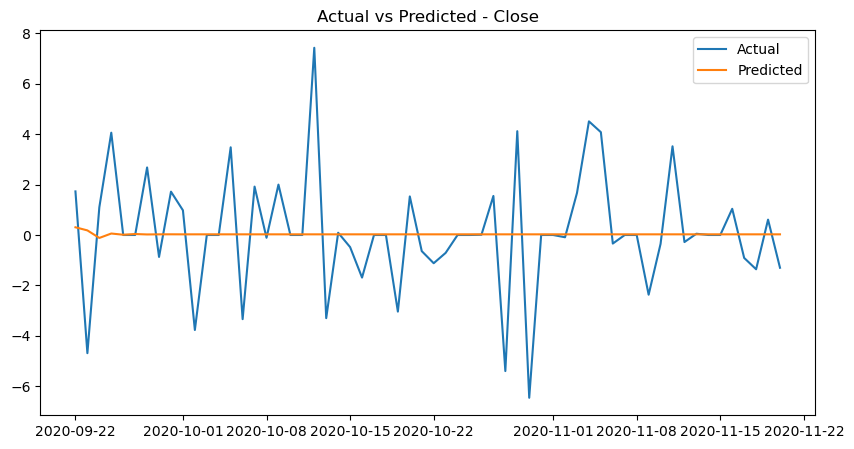

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(test.index, test['Close'], label='Actual')
plt.plot(forecast.index, forecast['Close'], label='Predicted')
plt.legend()
plt.title("Actual vs Predicted - Close")
plt.show()


In [57]:
rmse_all = {}

for col in test.columns:
    rmse_all[col] = np.sqrt(
        mean_squared_error(test[col], forecast[col])
    )

rmse_all


{'Open': np.float64(2.4274104713058917),
 'High': np.float64(1.8851464828967435),
 'Low': np.float64(1.8553044598909987),
 'Close': np.float64(2.370756833234513),
 'Volume': np.float64(34334272.71455921),
 'Adj Close': np.float64(2.303186729801428)}

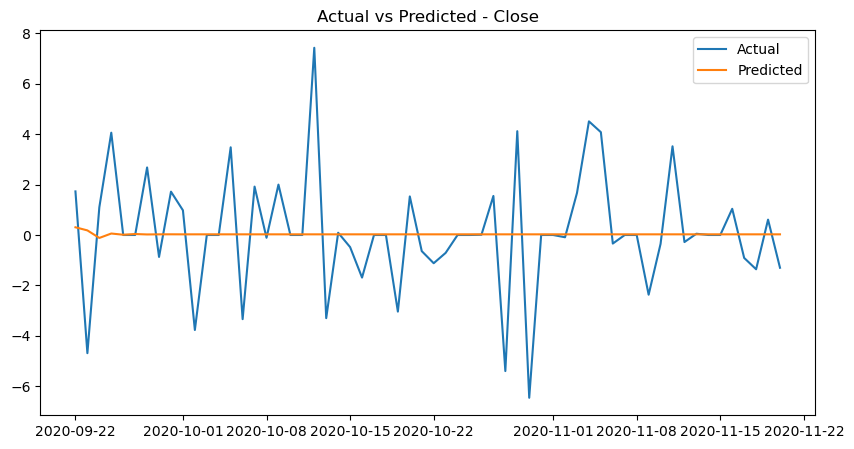

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(test.index, test['Close'], label='Actual')
plt.plot(forecast.index, forecast['Close'], label='Predicted')
plt.legend()
plt.title("Actual vs Predicted - Close")
plt.show()


In [59]:
#Evaluate Close price RMSE
rmse_close = np.sqrt(
    mean_squared_error(
        test['Close'],
        forecast['Close']
    )
)

print("VAR RMSE (Close):", rmse_close)


VAR RMSE (Close): 2.370756833234513


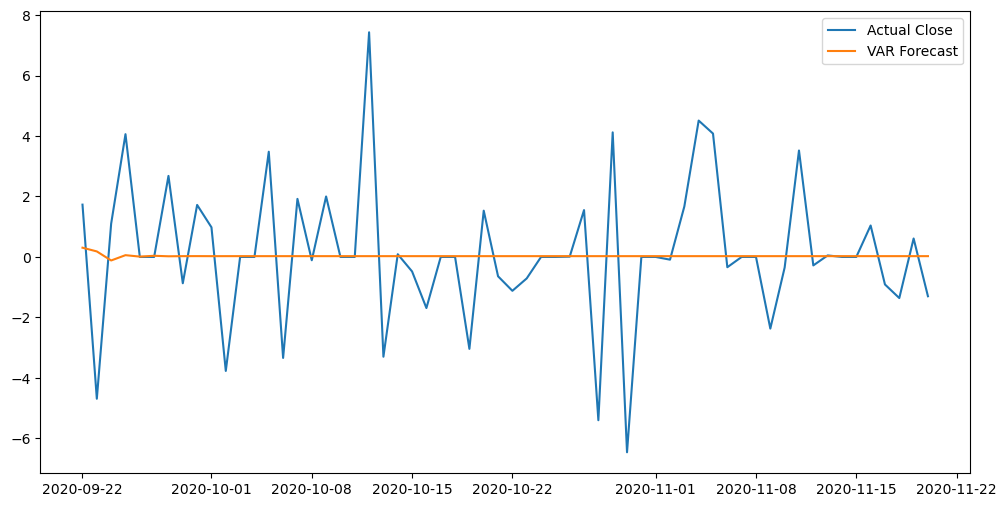

In [60]:
#Plot actual vs predicted
plt.figure(figsize=(12,6))
plt.plot(test.index, test['Close'], label='Actual Close')
plt.plot(forecast.index, forecast['Close'], label='VAR Forecast')
plt.legend()
plt.show()


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")


In [62]:
def adf(series):
    return adfuller(series.dropna())[1]


In [63]:
def rmse(actual, predicted):
    return np.sqrt(mean_squared_error(actual, predicted))


In [64]:
def build_var_bivariate(df, col1, col2):
    
    print(f"\n========== VAR MODEL: {col1} & {col2} ==========")

    pair = df[[col1, col2]]

    # Differencing
    pair_diff = pair.diff().dropna()

    # Stationarity check
    print("ADF p-values:")
    print(col1, adf(pair_diff[col1]))
    print(col2, adf(pair_diff[col2]))

    # Train-test split
    train = pair_diff[:-60]
    test  = pair_diff[-60:]

    # Lag selection
    model = VAR(train)
    lag_order = model.select_order(10).aic
    p = model.select_order(10).aic

    print("Selected lag:", p)

    # Fit VAR
    var_model = model.fit(p)

    # Forecast
    forecast = var_model.forecast(
        y=train.values,
        steps=60
    )

    forecast = pd.DataFrame(
        forecast,
        index=test.index,
        columns=[col1, col2]
    )

    # Evaluate Close only
    close_rmse = rmse(test['Close'], forecast['Close'])

    print("RMSE (Close):", close_rmse)

    return forecast


In [65]:
#VAR: High & Close
forecast_high = build_var_bivariate(data, 'High', 'Close')



========== VAR MODEL: High & Close ==========
ADF p-values:
High 2.4700078101131762e-18
Close 5.8841526384814504e-21
Selected lag: 10
RMSE (Close): 2.3849408748276995


In [66]:
forecast_low = build_var_bivariate(data, 'Low', 'Close')
forecast_open = build_var_bivariate(data, 'Open', 'Close')
forecast_volume = build_var_bivariate(data, 'Volume', 'Close')
forecast_adj = build_var_bivariate(data, 'Adj Close', 'Close')



========== VAR MODEL: Low & Close ==========
ADF p-values:
Low 3.143577707555818e-20
Close 5.8841526384814504e-21
Selected lag: 10
RMSE (Close): 2.3879669185057235

========== VAR MODEL: Open & Close ==========
ADF p-values:
Open 3.3367834104814787e-19
Close 5.8841526384814504e-21
Selected lag: 10
RMSE (Close): 2.396709658675549

========== VAR MODEL: Volume & Close ==========
ADF p-values:
Volume 0.0
Close 5.8841526384814504e-21
Selected lag: 10
RMSE (Close): 2.369282755558154

========== VAR MODEL: Adj Close & Close ==========
ADF p-values:
Adj Close 7.129428361360706e-21
Close 5.8841526384814504e-21
Selected lag: 10
RMSE (Close): 2.36725607697855


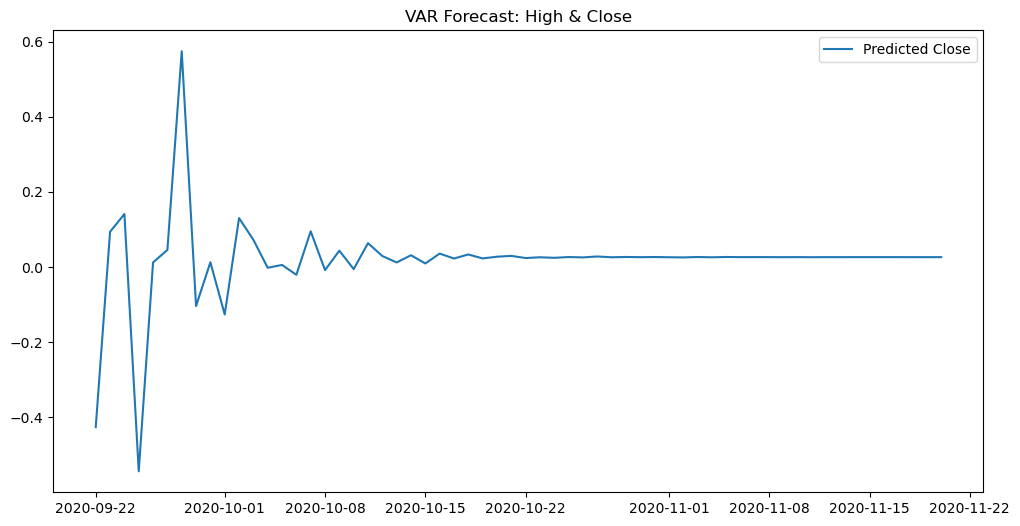

In [67]:
plt.figure(figsize=(12,6))
plt.plot(forecast_high['Close'], label='Predicted Close')
plt.title("VAR Forecast: High & Close")
plt.legend()
plt.show()


MODEL 1 — VAR (Vector AutoRegression)
✔ All variables depend on each other

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")


In [69]:
data_diff = data.diff().dropna()


In [70]:
train = data_diff[:-60]
test  = data_diff[-60:]


In [71]:
model = VAR(train)
lag_order = model.select_order(15)
lag_order.summary()


,AIC,BIC,FPE,HQIC
0,22.68,22.69,7.103e+09,22.69
1,22.00,22.06,3.571e+09,22.02
2,21.87,22.00,3.150e+09,21.92
3,21.68,21.87,2.614e+09,21.75
4,21.55,21.79,2.275e+09,21.63
5,21.46,21.76,2.082e+09,21.56
6,21.37,21.72,1.901e+09,21.49
7,21.26,21.67,1.708e+09,21.41
8,21.18,21.65,1.582e+09,21.35
9,21.09,21.62*,1.445e+09,21.28


In [72]:
var_model = model.fit(2)
print(var_model.summary())


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 21, Jan, 2026
Time:                     10:30:03
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                    21.9789
Nobs:                     3911.00    HQIC:                   21.8982
Log likelihood:          -75953.9    FPE:                3.09730e+09
AIC:                      21.8538    Det(Omega_mle):     3.03624e+09
--------------------------------------------------------------------
Results for equation Open
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                0.017744         0.009563            1.855           0.064
L1.Open             -0.702847         0.031480          -22.327           0.000
L1.High              0.160123         0.042307            3.785  

In [73]:
forecast = var_model.forecast(
    y=train.values,
    steps=60
)

forecast = pd.DataFrame(
    forecast,
    index=test.index,
    columns=train.columns
)


In [74]:
forecast

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2020-09-22,4.216984,2.365902,2.502848,0.305816,5.458597e+07,0.313010
2020-09-23,-0.549078,-0.206250,-0.072334,0.182384,-1.624559e+07,0.166498
2020-09-24,0.045963,-0.092518,-0.097008,-0.116929,-1.790012e+06,-0.107996
2020-09-25,0.019669,0.073669,0.046965,0.058685,1.730747e+06,0.056683
2020-09-26,0.004478,0.005658,0.019711,0.010927,5.075681e+05,0.010935
2020-09-27,0.042509,0.034771,0.026586,0.038201,-6.457696e+05,0.037318
2020-09-28,0.023008,0.026956,0.026073,0.021783,-8.536488e+04,0.021435
2020-09-29,0.022622,0.024773,0.024186,0.026204,5.215704e+04,0.025728
2020-09-30,0.028256,0.027721,0.025142,0.027385,-1.319055e+05,0.026866


In [75]:
rmse_close = np.sqrt(
    mean_squared_error(
        test['Close'],
        forecast['Close']
    )
)

print("VAR RMSE (Close):", rmse_close)


VAR RMSE (Close): 2.370756833234513


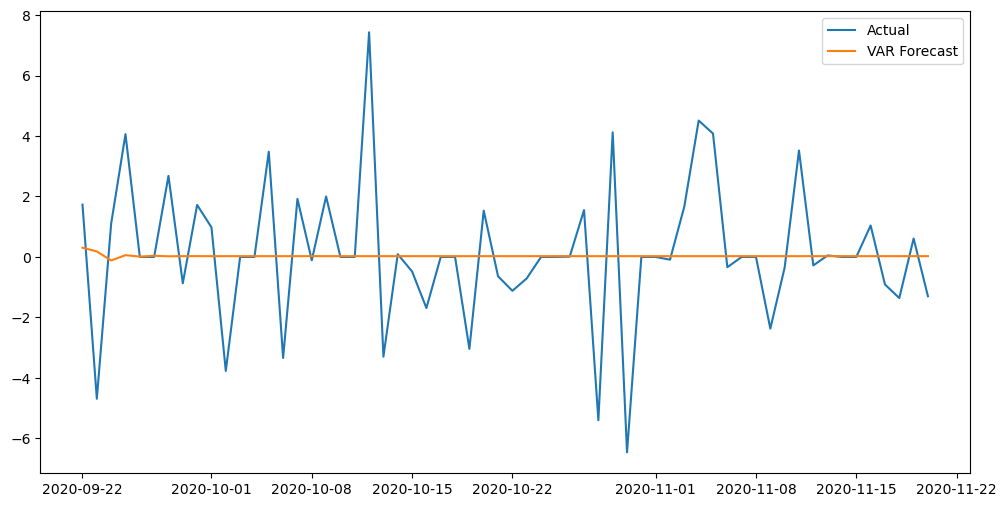

In [76]:
plt.figure(figsize=(12,6))
plt.plot(test.index, test['Close'], label='Actual')
plt.plot(forecast.index, forecast['Close'], label='VAR Forecast')
plt.legend()
plt.show()


In [77]:
#Build SARIMAX with multi-exog
exog_vars = ['Open','High','Low','Volume','Adj Close']

train_y = data['Close'][:-60]
test_y  = data['Close'][-60:]

train_exog = data[exog_vars][:-60]
test_exog  = data[exog_vars][-60:]


In [78]:
model_sarimax = SARIMAX(
    train_y,
    exog=train_exog,
    order=(1,1,1),
    seasonal_order=(1,1,1,7)
)

result = model_sarimax.fit()


In [79]:
#Forecast
forecast_sarimax = result.predict(
    start=test_y.index[0],
    end=test_y.index[-1],
    exog=test_exog,
    dynamic=True
)


In [80]:
rmse_sarimax = np.sqrt(
    mean_squared_error(test_y, forecast_sarimax)
)

print("SARIMAX RMSE:", rmse_sarimax)


SARIMAX RMSE: 0.3541994113802464


In [83]:
from statsmodels.tsa.statespace.varmax import VARMAX
data_diff = data[['Open','High','Low','Close','Volume','Adj Close']].diff().dropna()

In [85]:
model_varmax = VARMAX(data_diff, order=(1,0))
result_varmax = model_varmax.fit(maxiter=10)





In [86]:
forecast_varmax = result_varmax.forecast(steps=60)


In [87]:
rmse_varmax = np.sqrt(
    mean_squared_error(
        data['Close'][-60:],
        forecast_varmax['Close']
    )
)

print("VARMAX RMSE:", rmse_varmax)


VARMAX RMSE: 1756.5763198584302


method 2

In [88]:
returns = np.log(data[['Close','Volume']]).diff().dropna()

model = VARMAX(
    returns,
    order=(1, 0)   # AR only
)

result = model.fit(disp=False)


In [89]:
forecast_varmax1 = result.forecast(steps=60)

In [90]:
rmse_varmax = np.sqrt(
    mean_squared_error(
        data['Close'][-60:],
        forecast_varmax1['Close']
    )
)

print("VARMAX RMSE:", rmse_varmax)


VARMAX RMSE: 115.84908947252666
